In [1]:
pip install scikit-fuzzy

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


Signal Timing: 5.878048780487805


C:\Users\Admin\AppData\Roaming\Python\Python39\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


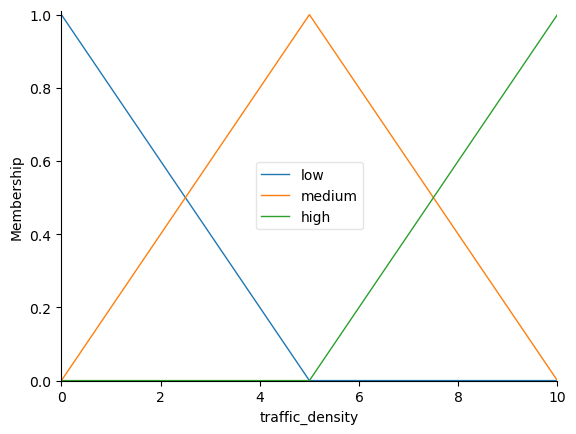

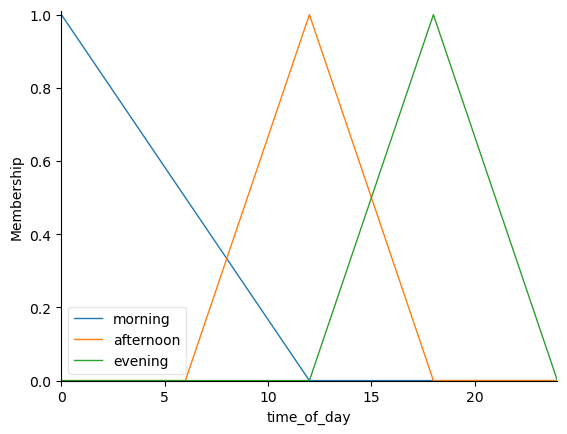

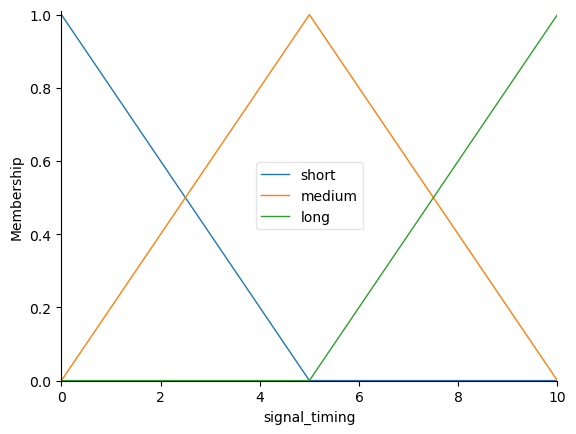

In [2]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl
import matplotlib.pyplot as plt

# Define input variables
traffic_density = ctrl.Antecedent(np.arange(0, 11, 1), 'traffic_density')
time_of_day = ctrl.Antecedent(np.arange(0, 25, 1), 'time_of_day')

# Define output variable
signal_timing = ctrl.Consequent(np.arange(0, 11, 1), 'signal_timing')

# Generate fuzzy membership functions
traffic_density['low'] = fuzz.trimf(traffic_density.universe, [0, 0, 5])
traffic_density['medium'] = fuzz.trimf(traffic_density.universe, [0, 5, 10])
traffic_density['high'] = fuzz.trimf(traffic_density.universe, [5, 10, 10])

time_of_day['morning'] = fuzz.trimf(time_of_day.universe, [0, 0, 12])
time_of_day['afternoon'] = fuzz.trimf(time_of_day.universe, [6, 12, 18])
time_of_day['evening'] = fuzz.trimf(time_of_day.universe, [12, 18, 24])

signal_timing['short'] = fuzz.trimf(signal_timing.universe, [0, 0, 5])
signal_timing['medium'] = fuzz.trimf(signal_timing.universe, [0, 5, 10])
signal_timing['long'] = fuzz.trimf(signal_timing.universe, [5, 10, 10])

# Define rules
rule1 = ctrl.Rule(traffic_density['low'] | time_of_day['evening'], signal_timing['long'])
rule2 = ctrl.Rule(traffic_density['medium'] & time_of_day['morning'], signal_timing['medium'])
rule3 = ctrl.Rule(traffic_density['medium'] & time_of_day['afternoon'], signal_timing['short'])
rule4 = ctrl.Rule(traffic_density['high'] & time_of_day['evening'], signal_timing['short'])

# Create control system
signal_ctrl = ctrl.ControlSystem([rule1, rule2, rule3, rule4])
traffic_signal = ctrl.ControlSystemSimulation(signal_ctrl)

# Pass inputs and compute
traffic_signal.input['traffic_density'] = 7
traffic_signal.input['time_of_day'] = 18
traffic_signal.compute()

# Plot membership functions
traffic_density.view()
time_of_day.view()
signal_timing.view()

# Output
print("Signal Timing:", traffic_signal.output['signal_timing'])

plt.show()
